## 예제
1. csv 폴더에서 4개의 파일을 로드(tran1.tran2.tran_d_1,trand_d_2)
2. tran_1과 tran_2는 단순한 행 추가 결합(유니언 결합)
3. tran_d_1, tran_d_2도 유니언 결합
4. 2번,3번 과정에서 나온 데이터프레임을 특정 조건에 맞춰서 2번 데이터프레임 기준으로 열 추가 결합(조인 결합)
5. csv폴더에 있는 2개의 파일 로드(custom_master, item_master)
6. 4번 과정에서 나온 데이터프레임과 custom_master 조인 결합
7. 6번 과정에서 나온 데이터프레임과 item_mater 조인 결합
8. 결합이 된 데이터프레임에서 quantity컬럼과 item_price컬럼의 데이터를 가지고 total_price라는 파생변수를 생성(total_price=item_price*quantity)

In [253]:
import pandas as pd

In [254]:
tran1=pd.read_csv("../csv/tran_1.csv")
tran2=pd.read_csv("../csv/tran_2.csv")
tran_d_1=pd.read_csv("../csv/tran_d_1.csv")
tran_d_2=pd.read_csv("../csv/tran_d_2.csv")

In [255]:
N_1=pd.concat([tran1,tran2],axis=0)
N_1.columns

Index(['transaction_id', 'price', 'payment_date', 'customer_id'], dtype='object')

In [256]:
N_2=pd.concat([tran_d_1,tran_d_2],axis=0)
N_2.columns

Index(['detail_id', 'transaction_id', 'item_id', 'quantity'], dtype='object')

In [257]:
N_J_1=pd.merge(N_1,N_2, on='transaction_id',how='left' )
N_J_1.columns

Index(['transaction_id', 'price', 'payment_date', 'customer_id', 'detail_id',
       'item_id', 'quantity'],
      dtype='object')

In [258]:
custom_master=pd.read_csv("../csv/customer_master.csv")
item_master=pd.read_csv("../csv/item_master.csv")
item_master.columns

Index(['item_id', 'item_name', 'item_price'], dtype='object')

In [259]:
N_J_2=pd.merge(N_J_1,custom_master,on='customer_id',how='inner')
N_J_2.columns

Index(['transaction_id', 'price', 'payment_date', 'customer_id', 'detail_id',
       'item_id', 'quantity', 'name', 'class', 'gender', 'start_date',
       'end_date', 'campaign_id', 'is_deleted'],
      dtype='object')

In [260]:
N_J_3=pd.merge(N_J_2,item_master,on='item_id',how='inner')

In [261]:
N_J_3['total_price']=N_J_3['quantity']*N_J_3['item_price']

In [262]:
N_J_3

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,M,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
1,T0000003439,420000,2019-04-30 02:39:00,HD298120,3494,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
2,T0000003439,420000,2019-04-30 02:39:00,HD298120,3495,S005,1,XXXXX,C02,F,2017-07-01 00:00:00,NaN,CA2,0,PC-E,210000,210000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,3,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
4,T0000000832,210000,2019-02-19 19:48:24,IK452215,753,S005,1,XXXX,C03,M,2018-01-01 00:00:00,NaN,CA1,0,PC-E,210000,210000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6064,T0000006675,120000,2019-07-26 04:57:13,GD139734,6910,S003,1,XXXX,C03,M,2018-10-01 00:00:00,NaN,CA1,0,PC-C,120000,120000
6065,T0000006751,120000,2019-07-28 10:14:39,PL988722,6989,S003,1,XXX,C03,M,2017-02-01 00:00:00,NaN,CA1,0,PC-C,120000,120000
6066,T0000006757,120000,2019-07-28 11:23:32,HI015767,6995,S003,1,XXXXX,C03,M,2015-12-01 00:00:00,NaN,CA1,0,PC-C,120000,120000
6067,T0000006835,240000,2019-07-30 11:08:09,HI555356,7078,S003,2,XXXXX,C02,M,2018-07-11 00:00:00,2019-03-31 00:00:00,CA1,1,PC-C,120000,240000


In [263]:
N_J_3["payment_date"]=pd.to_datetime(N_J_3["payment_date"], format="%Y-%m-%d %H:%M:%S")
N_J_3["payment_date"]


0      2019-02-01 01:36:57
1      2019-04-30 02:39:00
2      2019-04-30 02:39:00
3      2019-02-01 02:47:23
4      2019-02-19 19:48:24
               ...        
6064   2019-07-26 04:57:13
6065   2019-07-28 10:14:39
6066   2019-07-28 11:23:32
6067   2019-07-30 11:08:09
6068   2019-07-31 20:25:02
Name: payment_date, Length: 6069, dtype: datetime64[ns]

In [264]:
group_data=N_J_3[['item_name','total_price']].groupby('item_name').sum()
group_data.sort_values('total_price',ascending=False).index[0]


'PC-E'

In [265]:
origin_data=N_J_3.copy()

In [266]:
#loc를 이용하여 m,f를 변경
# m은 남자 f는 여자

N_J_3.loc[N_J_3['gender']=='M','gender']= '남자'
N_J_3.loc[N_J_3['gender']=='F','gender']= '여자'

N_J_3['gender'].value_counts()

남자    3268
여자    2801
Name: gender, dtype: int64

In [267]:
N_J_3=origin_data.copy()

In [268]:
# apply() 사용하여 남자,여자 변경

def change(x):
    # x에는 M아니면 F
    if x=='F':
        result ='여자'
    else:
        result ='남자'
    return result

N_J_3['gender'].apply(change)

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [269]:
N_J_3=origin_data.copy()
N_J_3['gender'].apply(lambda x : "남자" if(x=='M') else 
                      ("여자" if(x=="F") else "무응답" )
                       )

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [270]:
mapping={"M":"남자","F":"여자"}
N_J_3.replace(mapping, inplace=True)


In [271]:
N_J_3["gender"]

0       남자
1       여자
2       여자
3       남자
4       남자
        ..
6064    남자
6065    남자
6066    남자
6067    남자
6068    남자
Name: gender, Length: 6069, dtype: object

In [272]:
N_J_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6069 entries, 0 to 6068
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  6069 non-null   object        
 1   price           6069 non-null   int64         
 2   payment_date    6069 non-null   datetime64[ns]
 3   customer_id     6069 non-null   object        
 4   detail_id       6069 non-null   int64         
 5   item_id         6069 non-null   object        
 6   quantity        6069 non-null   int64         
 7   name            6069 non-null   object        
 8   class           6069 non-null   object        
 9   gender          6069 non-null   object        
 10  start_date      6069 non-null   object        
 11  end_date        1978 non-null   object        
 12  campaign_id     6069 non-null   object        
 13  is_deleted      6069 non-null   int64         
 14  item_name       6069 non-null   object        
 15  item

In [273]:
# 시계열 데이터에서 월-년 추출해서 새로운 파생변수 payment_month생성
N_J_3["payment_month"]=N_J_3['payment_date'].dt.strftime("%m-%Y")



In [274]:
N_J_3.head(1)

,transaction_id,price,payment_date,customer_id,detail_id,item_id,quantity,name,class,gender,start_date,end_date,campaign_id,is_deleted,item_name,item_price,total_price,payment_month
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,0,S005,1,XX,C01,남자,2018-07-01 00:00:00,NaN,CA1,0,PC-E,210000,210000,02-2019


In [290]:
# 월별 거래량을 확인

group_data=N_J_3[['payment_month','total_price']].groupby('payment_month').agg(['mean','sum'])

In [291]:
group_data

total_price           
                        mean        sum
payment_month                          
02-2019        137592.964824  136905000
03-2019        135154.382470  135695000
04-2019        136106.106106  135970000
05-2019        133551.307847  132750000
06-2019        135747.800587  138870000
07-2019        138377.609108  145850000

In [ ]:
!pip install matplotlib

<Axes: xlabel='payment_month'>

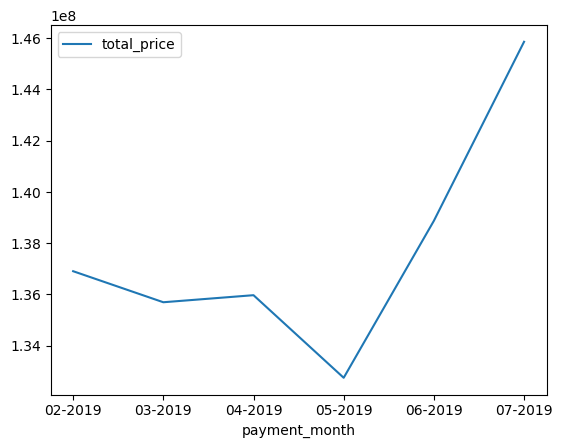

In [279]:
group_data.plot()

<Axes: xlabel='payment_month'>

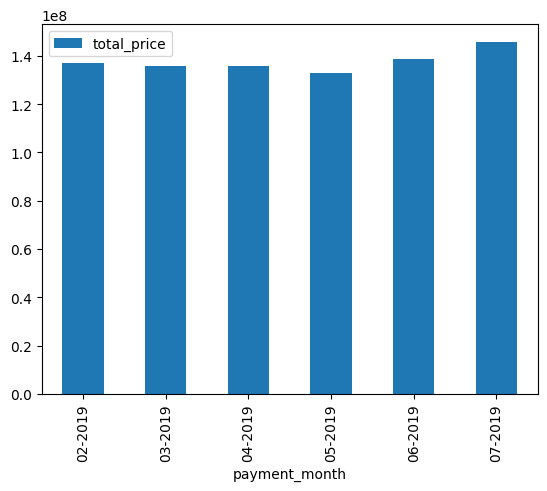

In [280]:
group_data.plot.bar()

In [287]:
pivot_data =pd.pivot_table(
    N_J_3,
    index= 'payment_month',
    aggfunc=['sum','mean','min','max','std'],
    values= 'total_price'


)

In [ ]:
pivot_data.plot.bar()